In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df= pd.read_csv('airline_passengers.csv', index_col= 'Month', parse_dates= True)

In [6]:
df.index.freq= 'MS'

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [12]:
fitted_model= ExponentialSmoothing(train_data['Thousands of Passengers'],
                    trend= 'mul',
                    seasonal= 'mul',
                    seasonal_periods= 12).fit()

In [13]:
test_predictions= fitted_model.forecast(36)

In [14]:
test_predictions

1958-02-01    339.146252
1958-03-01    399.284474
1958-04-01    394.235196
1958-05-01    402.545303
1958-06-01    473.128007
1958-07-01    521.796520
1958-08-01    514.516182
1958-09-01    446.221344
1958-10-01    385.435189
1958-11-01    339.648129
1958-12-01    381.458569
1959-01-01    401.212425
1959-02-01    387.161260
1959-03-01    455.813618
1959-04-01    450.049483
1959-05-01    459.536102
1959-06-01    540.111631
1959-07-01    595.670443
1959-08-01    587.359382
1959-09-01    509.395627
1959-10-01    440.003604
1959-11-01    387.734191
1959-12-01    435.463990
1960-01-01    458.014521
1960-02-01    441.974046
1960-03-01    520.345937
1960-04-01    513.765738
1960-05-01    524.595436
1960-06-01    616.578535
1960-07-01    680.003148
1960-08-01    670.515440
1960-09-01    581.513880
1960-10-01    502.297604
1960-11-01    442.628090
1960-12-01    497.115288
1961-01-01    522.858436
Freq: MS, dtype: float64

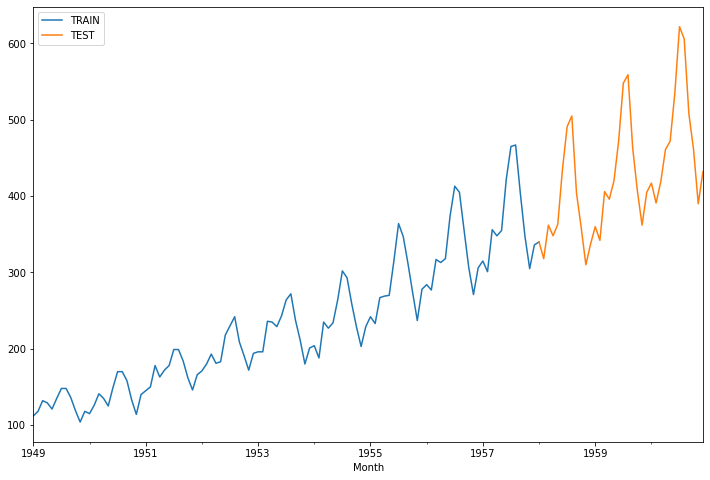

In [15]:
train_data['Thousands of Passengers'].plot(legend= True, label= 'TRAIN', figsize= (12,8))
test_data['Thousands of Passengers'].plot(legend= True, label= 'TEST')

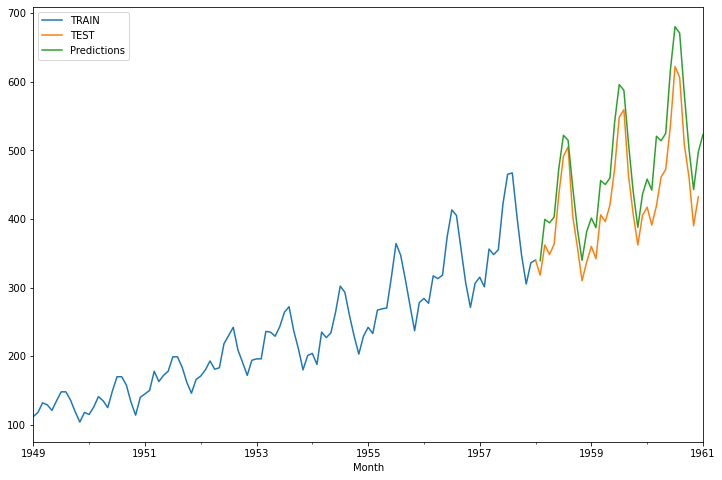

In [16]:
train_data['Thousands of Passengers'].plot(legend= True, label= 'TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend= True, label= 'TEST')
test_predictions.plot(legend= True, label= 'Predictions')